# Lista 1 (8 pkt.)

In [20]:
import string
import matplotlib.pyplot as plt
import numpy as np

## Zadanie 1 (1 pkt.)

Zaimplementuj szyfr Cezara. Napisz funkcję **Cezar(tekst, klucz)** tak aby jako argumenty przyjmowała tekst do zaszyfrowania oraz klucz a zwracała zaszyfrowany tekst. Funkcja ta dostając jako argumenty zaszyfrowany tekst oraz **-klucz** (klucz, ktorym zaszyfrowano tekst ze znakiem minus) będzie zwracała odszyfrowany tekst. Funkcja powinna przejść testy, czyli powinna 8 razy zwrócić **True**.

Pamiętaj o polskich znakach. Szyfrujemy tylko litery, natomiast cyfry, znaki interpunkcyjne i białe znaki zostają bez zmian. Wielkie litery po zaszyfrowaniu są również wielkie. Użyj poniższego alfabetu.

In [17]:
alfabet = ['a','ą', 'b', 'c', 'ć', 'd', 'e', 'ę', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'ł', 'm', 
           'n', 'ń', 'o','ó', 'p', 'q','r', 's', 'ś', 't', 'u','v', 'w', 'x','y', 'z','ź','ż']

Przy implementacji mogą być przydatne takie elementy biblioteki string jak: **string.punctuation, string.whitespace, string.digits, upper(), lower(), isupper()**

In [35]:
def Cezar(tekst,klucz) -> str:
    result = ""
    n = len(alfabet)
    for c in tekst:
        if c in string.digits or c in string.whitespace or c in string.punctuation:
            result += c
            continue
        upperCase = False
        lc = c
        if c.isupper():
            upperCase = True
            lc = c.lower()
        if lc not in alfabet:
            result += c
            continue
        nc = alfabet[(alfabet.index(lc) + klucz) % n]
        if upperCase:
            nc = nc.upper()
        result += nc
    return result

In [37]:
print(Cezar('Ala ma kota.',3)=='Cnc oc mqwc.')
print(Cezar('Ala ma kota.',20)=='Óżó ąó źćió.')
print(Cezar('Ala ma 2 koty.',5)=='Dod pd 2 ńsyą.')
print(Cezar('Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.',7)
                  =='Jęxkrsk eępk, vxuesc źxżj,\nGkćyńpsk ćqtxćkhćksńę!\nVxćkecźchn óyćźęqźuą eęjks hżj\nSńk ąxuhń jt ńyźsńksńę.')
print(Cezar('Cnc oc mqwc.',-3)=='Ala ma kota.')
print(Cezar('Óżó ąó źćió.',-20)=='Ala ma kota.')
print(Cezar('Dod pd 2 ńsyą.',-5)=='Ala ma 2 koty.')
print(Cezar('Jęxkrsk eępk, vxuesc źxżj,\nGkćyńpsk ćqtxćkhćksńę!\nVxćkecźchn óyćźęqźuą eęjks hżj\nSńk ąxuhń jt ńyźsńksńę.',-7)
                  =='Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.')

True
True
True
True
True
True
True
True


## Zadanie 2 (1 pkt.)

Wiedząc, że poniższy tekst zaszyfrowano metodą Cezara, odszyfruj go metodą "brute force". Co to za cytat?

In [38]:
tekst = 'Hćcrek okyź hćęy? Okzpń sńóź rsńk t źt sńk vcźę, ąńkr. Okzpń vcźęofhkrż żyńqżol ącźqżręhćci, sńk ąńkr.'

In [40]:

for klucz in range(len(alfabet)):
    decoded = Cezar(tekst, -klucz)
    print(f"{klucz}: {decoded}")


0: Hćcrek okyź hćęy? Okzpń sńóź rsńk t źt sńk vcźę, ąńkr. Okzpń vcźęofhkrż żyńqżol ącźqżręhćci, sńk ąńkr.
1: Gcbqdj ńjxz gcex? Ńjyón rnoz qrnj ś zś rnj ubze, anjq. Ńjyón ubzeńęgjqź źxnpźńk abzpźqegcbh, rnj anjq.
2: Fbąpći niwy fbdw? Nixom qmńy pqmi s ys qmi tąyd, żmip. Nixom tąydnefipz zwmóznj żąyózpdfbąg, qmi żmip.
3: Ęąaóch mhvx ęąćv? Mhwńł płnx ópłh r xr płh śaxć, źłhó. Mhwńł śaxćmdęhóy yvłoymi źaxoyóćęąaf, płh źłhó.
4: Eażobg łguw eacu? Łgvnl ólmw oólg q wq ólg sżwc, zlgo. Łgvnl sżwcłćegox xulńxłh zżwńxoceażę, ólg zlgo.
5: Dżźńąf lftv dżbt? Lfumk okłv ńokf p vp okf rźvb, ykfń. Lfumk rźvblcdfńw wtknwlg yźvnwńbdżźe, okf ykfń.
6: Ćźznaę kęśu ćźąś? Kętłj ńjlu nńję ó uó ńję qzuą, xjęn. Kętłj qzuąkbćęnv vśjmvkf xzumvnąćźzd, ńję xjęn.
7: Czymże jest czas? Jeśli nikt mnie o to nie pyta, wiem. Jeśli pytającemu usiłuję wytłumaczyć, nie wiem.
8: Byxłźd idrś byżr? Idskh mhjś łmhd ń śń mhd óxśż, vhdł. Idskh óxśżiabdłt trhltie vxśltłżbyxc, mhd vhdł.
9: Ąxwlzć hćqs ąxźq? Hćrjg łgis lłgć n sn łgć 

### Poprawny tekst jest dla klucza = 7.
"Czymże jest czas? Jeśli nikt mnie o to nie pyta, wiem. Jeśli pytającemu usiłuję wytłumaczyć, nie wiem."

## Zadanie 3 (2 pkt.)

Plik **'ksiazka1.txt'** zawiera tekst pewnej książki zaszyfrowany metodą Cezara. Dokonaj analizy statystycznej liter i na tej podstawie znajdź klucz oraz odszyfruj tekst. Jaka to książka?

Do wczytania pliku możesz użyć poniższego kodu.

In [142]:
plik=open('ksiazka1.txt', encoding='utf8')
ksiazka=plik.read()
plik.close()

Słownik **czestoliwosc** zawiera częstotliwości występowania liter w języku polskim.

In [42]:
czestotliwosc = {'a':0.0891,'ą':0.0099, 'b':0.0147, 'c':0.0396, 'ć':0.004, 'd':0.0325, 'e':0.0766, 'ę':0.0111, 'f':0.003, 
                 'g':0.0142, 'h':0.0108, 'i':0.0821, 'j':0.0228, 'k':0.0351, 'l':0.021, 'ł':0.0182,'m':0.028, 'n':0.0552, 
                 'ń':0.002, 'o':0.0775,'ó':0.0085, 'p':0.0313, 'q':0.0014, 'r':0.0469, 's':0.0432,'ś':0.0066, 't':0.0398,
                 'u':0.025, 'v': 0.0004, 'w':0.0465 ,'x':0.0002,'y':0.0376, 'z':0.0564,'ź':0.0006,'ż':0.0083}

<BarContainer object of 35 artists>

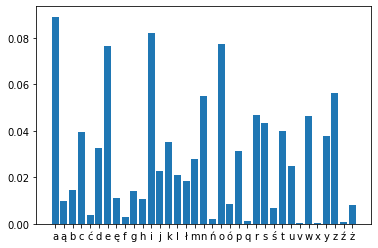

In [11]:
plt.bar(czestotliwosc.keys(),czestotliwosc.values())

In [125]:
count_letters = dict.fromkeys(alfabet,0)
for c in ksiazka.lower():
    if c in alfabet:
        count_letters[c] += 1
letters_in_language = sorted(czestotliwosc.items(), key=lambda x: x[1], reverse=True)
nc = sorted(count_letters.items(), key=lambda x: x[1],reverse=True)
idx_book = alfabet.index(nc[0][0])
idx_language = alfabet.index(letters_in_language[0][0])
klucz = (idx_book-idx_language) % len(alfabet)
decoded = Cezar(ksiazka, -klucz)

In [126]:
print(decoded[:1000])

Łfd A



Ńkłyh

Ń hgćefuef-ńkużfwead bśuax Szjóba cxró Xźahł, fąupópes esąkłsjkpxą uóńacapsuąa ń lńaxuax. Hjpxw łjpxds, upłxjxds, s esńxł hayuafds łókaśusda csł, baxwó ń ljfwbfńxą Xmjfhax fwpasea ń kmjfńx kbgjó tsjtsjpóęuó bjóca kay hf ąskbaeasuż, Xźahł - ąmr hfkaswsć ńókfbś fjźseapsuąy khfćxupeś, jfceaułńf, jpxdafkćs a całxjsłmjy. Eswx ńkpókłbf psl ńóbfeóńsć fctjpódax hjsux aeróeaxjkbax a ńpefkać bfcfkscex tmwfńcx, błgjóuż kpupśłba tmwpś hfwpań ń łxużeabsuż efńfrółeóuż.

Xźahł - ąxkł łf rópeó ńśńgp daywpó hmkłóeaś Cataąkbś a Sjstkbś. Źćytfbflv ąxźf ńóefka bacbskxł dxłjgń, wćmźflv kłf łjpówpaxlua dac, ljxweas kpxjfbflv pscxwńf dacy. Fw psużfwm - ćsźfwex, scx esźax ńpźgjps cataąkbax, fw ńkużfwm kłjfdx a hfhybsex kbsćó sjstkbax kś luasesda łxźf bfjółsjps, błgjxźf wexd hćóeax jpxbs - Eac.

P taxźaxd jpxba, es hgćefu, luaseó ńśńfpm pearsąś kay, s ń fwcxźćflua wńmwpaxkłm hayuam dac fw Dfjps Ljgwpaxdexźf esźcx jfpużfwpś kay, a Eac, psdaskł hćóeśv uaskeód bfjółsjpxd, jfpcxńs kay bacbfds jsdaf

In [143]:
from numpy.linalg import norm

def calc_freq(text):
    d = dict().fromkeys(alfabet,0)
    for c in text:
        lc = c.lower()
        if lc in alfabet:
            d[lc] +=1
    suma = sum(d.values())
    for c in d.keys():
        d[c] = d[c]/suma
    return d

max_sim = 0
key = None
for key_char in nc[:5]:
    decoded_text = Cezar(ksiazka, -alfabet.index(key_char[0]))
    freq = calc_freq(decoded_text)
    freq_org = np.array(list(freq.values()), dtype=float)
    freq2 = np.array(list(czestotliwosc.values()), dtype=float)

    sim = np.dot(freq_org, freq2) / (np.linalg.norm(freq_org) * np.linalg.norm(freq2))
    if sim > max_sim:
        max_sim = sim
        key = alfabet.index(key_char[0])
decoded_text = Cezar(ksiazka, -key)

In [146]:
print(decoded_text[:2000])

Tom I



Wstęp

W północno-wschodnim kącie Afryki leży Egipt, ojczyzna najstarszej cywilizacji w świecie. Przed trzema, czterema, a nawet pięcioma tysiącami lat, kiedy w środkowej Europie odziani w surowe skóry barbarzyńcy kryli się po jaskiniach, Egipt - już posiadał wysoką organizację społeczną, rolnictwo, rzemiosła i literaturę. Nade wszystko zaś wykonywał olbrzymie prace inżynierskie i wznosił kolosalne budowle, których szczątki budzą podziw w technikach nowożytnych.

Egipt - jest to żyzny wąwóz między pustynią Libijską i Arabską. Głębokość jego wynosi kilkaset metrów, długość sto trzydzieści mil, średnia szerokość zaledwo milę. Od zachodu - łagodne, ale nagie wzgórza libijskie, od wschodu strome i popękane skały arabskie są ścianami tego korytarza, którego dnem płynie rzeka - Nil.

Z biegiem rzeki, na północ, ściany wąwozu zniżają się, a w odległości dwudziestu pięciu mil od Morza Śródziemnego nagle rozchodzą się, i Nil, zamiast płynąć ciasnym korytarzem, rozlewa się kilkoma ramio

### Książka to "Faraon" Bolesława Prusa

## Zadanie 4 (2 pkt.)

Napisz dwie funkcje, szyfrującą i deszyfrującą, dla szyfru Vignere'a. Funkcja **Vignere_zaszyfruj(tekst, klucz)** przyjmuje jako argumenty tekst do zaszyfrowania oraz klucz w postaci słowa. Podobnie funkcja **Vignere_odszyfruj(tekst, klucz)** przyjmuje jako argumenty tekst zaszyfrowany oraz klucz w postaci słowa. Może być przydatne skorzystanie z zamiany liter na liczby (tzn. na liczby określające pozycję litery w alfabecie):

In [147]:
liczb_do_lit=dict()
lit_do_liczb=dict()
for i,l in enumerate(alfabet):
    liczb_do_lit[i]=l
    lit_do_liczb[l]=i

In [162]:
def Vignere_zaszyfruj(tekst,klucz):
    klucz = klucz.lower()
    szyfrogram = ""
    n = len(klucz)
    m = len(alfabet)
    i =0
    for c in tekst:
        if c in string.digits or c in string.whitespace or c in string.punctuation:
            szyfrogram += c
            continue
        if c.lower() in lit_do_liczb:
            isUpper = False
            if c.isupper():
                isUpper = True
            idx_c = lit_do_liczb[c.lower()]
            idx_k = lit_do_liczb[klucz[i % n]]
            litera = liczb_do_lit[(idx_c + idx_k) % m]
            if isUpper:
                litera = litera.upper()
            szyfrogram += litera
            i+=1
        else:
            szyfrogram += c    
    return szyfrogram

In [166]:
def Vignere_odszyfruj(tekst,klucz):
    klucz = klucz.lower()
    szyfrogram = ""
    n = len(klucz)
    m = len(alfabet)
    i = 0
    for c in tekst:
        if c in string.digits or c in string.whitespace or c in string.punctuation:
            szyfrogram += c
            continue
        if c.lower() in lit_do_liczb:
            isUpper = False
            if c.isupper():
                isUpper = True
            idx_c = lit_do_liczb[c.lower()]
            idx_k = lit_do_liczb[klucz[i % n]]
            litera = liczb_do_lit[(idx_c - idx_k) % m]
            if isUpper:
                litera = litera.upper()
            szyfrogram += litera
            i += 1
        else:
            szyfrogram += c
    return szyfrogram

In [167]:
print(Vignere_zaszyfruj('Ala ma kota.','ela')=='Eva ql kśda.')
print(Vignere_zaszyfruj('Ala ma kota.','tygrys')=='Thg ćy bhqg.')
print(Vignere_zaszyfruj('Ala ma 2 koty.','indywidualistyczny')=='Iyd jw 2 ssńy.')
print(Vignere_zaszyfruj('Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.','asnyk')
                  =='Dsdbwnx myue, hdmjnó fodd,\nTrvbicżb hłfdvocprksa!\nHdvożófumh bevćaćfmę żsqbx cmq\nKse ńdmmi wą ębtevbxis.')
print(Vignere_odszyfruj('Eva ql kśda.','ela')=='Ala ma kota.')
print(Vignere_odszyfruj('Thg ćy bhqg.','tygrys')=='Ala ma kota.')
print(Vignere_odszyfruj('Iyd jw 2 ssńy.','indywidualistyczny')=='Ala ma 2 koty.')
print(Vignere_odszyfruj('Dsdbwnx myue, hdmjnó fodd,\nTrvbicżb hłfdvocprksa!\nHdvożófumh bevćaćfmę żsqbx cmq\nKse ńdmmi wą ębtevbxis.','asnyk')
                  =='Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.')

True
True
True
True
True
True
True
True


## Zadanie 5 (2 pkt.)

Plik **'ksiazka2.txt'** zawiera tekst pewnej książki zaszyfrowany metodą Vignere'a. Dokonaj analizy statystycznej liter i na tej podstawie znajdź klucz oraz odszyfruj tekst. Jaka to książka?

Wskazówka I: Zauważ, że w metodzie Vignere'a co $n$-ta litera (gdzie $n$ to długość klucza) jest zaszyfrowana metodą Cezara.

Wskazówka II: Najpierw ustal długość klucza $n$.

Do wczytania pliku możesz użyć poniższego kodu.

In [168]:
plik=open('ksiazka2.txt', encoding='utf8')
ksiazka=plik.read()
plik.close()